## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [7]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [34]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
 df.query('converted == 1').user_id.nunique() /df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [35]:
df.query('((landing_page == "new_page") and (group == "treatment")) == False').count()[0]

149167

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
df2= df.query('group == "treatment" and landing_page == "new_page"')
df1= df.query('group == "control" and landing_page == "old_page"')
df2= df2.append(df1)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [38]:
df2.shape[0]

290585

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### `3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [37]:
df2.user_id.nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [39]:
df2.loc[df2['user_id'].duplicated(), : ]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [27]:
df2.loc[df2['user_id'].duplicated(), : ]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [42]:
df2.drop(2893 , inplace= True)

In [44]:
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [45]:
df2.query('converted == "1"').count().user_id / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [54]:
df2.query('converted == "1" and group == "control"' ).count().user_id / df2.query('group == "control"').user_id.count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [53]:
df2.query('converted == "1" and group == "treatment"').count().user_id / df2.query('group =="treatment"').user_id.count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [55]:
df2.query('landing_page == "new_page"').user_id.count() / df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**No, because with statistic we don't have sufficient confident to conclude about parameter with accuracy.  we should build a confiednce interval by using bootstraping and sampling distribution of the statistic that best estimats our parameter  ...**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis2   in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0: Pnew - Pold <= 0**


**H1: Pnew - Pold >  0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [4]:
p_new = (df2.converted == 1).mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [5]:
p_old = (df2.converted == 1).mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [6]:
n_new= df2.query('group == "treatment" and landing_page  == "new_page"').count()[0]
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [10]:
n_old= df2.query('group =="control" and landing_page == "old_page" ').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.


In [14]:
new_page_converted = np.random.binomial(n_new,p_new, 10000)/ n_new
new_page_converted


array([ 0.11941973,  0.11915822,  0.11920639, ...,  0.11904123,
        0.11986016,  0.12008726])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [13]:
old_page_converted= np.random.binomial(n_old, p_old, 10000)/n_old
old_page_converted

array([ 0.11969795,  0.11767419,  0.11992511, ...,  0.1201385 ,
        0.11988381,  0.11872049])

g.Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and 
(f).

 mean of each and then subtracting would make sense as the array sizes are different for array subtraction to work.

In [15]:
diff= new_page_converted.mean() - old_page_converted.mean()
diff


-6.7254708125547014e-06

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.


In [21]:
diffs= new_page_converted - old_page_converted
diffs

array([  9.05815222e-04,  -5.19122246e-04,   1.45606759e-03, ...,
        -8.70393328e-04,   5.21050061e-05,  -2.14360187e-03])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    4.,    61.,   411.,  1399.,  2742.,  2941.,  1774.,   551.,
          105.,    12.]),
 array([-0.00479993, -0.00386252, -0.0029251 , -0.00198769, -0.00105027,
        -0.00011286,  0.00082456,  0.00176197,  0.00269938,  0.0036368 ,
         0.00457421]),
 <a list of 10 Patch objects>)

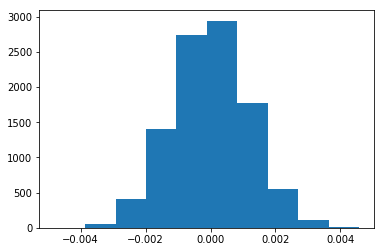

In [22]:
plt.hist(diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [24]:
old_page_converted_actual= df2.query('converted == "1" and landing_page  == "old_page"' ).count().user_id / df2.query('landing_page == "old_page"').shape[0]
old_page_converted_actual

0.1203863045004612

In [25]:
new_page_converted_actual= df2.query('converted == "1" and landing_page  == "new_page"' ).count().user_id / df2.query('landing_page == "new_page"').shape[0]
new_page_converted_actual

0.11880724790277405

In [27]:
diff = new_page_converted_actual- old_page_converted_actual
diff

-0.0015790565976871451

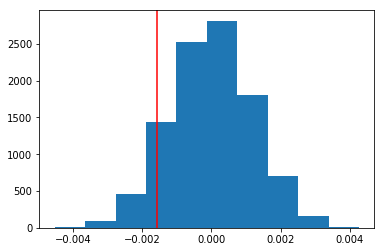

In [70]:
plt.hist(diffs)
plt.axvline(diff, c='red')

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


In [28]:
(diffs > diff).mean() 

0.90459999999999996

**Pvalue is 0.9  .Based on pvalue , We do not reject H0: Pnew - Pold <= 0  , insted we do reject H1:Pnew - Pold > 0. This means that new page does not increase conversion of user.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [9]:
import statsmodels.api as sm

# old page(control) 
convert_old = sum((df2.landing_page == 'old_page') & (df2.converted == 1)) 
convert_old

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489

In [28]:
# new page(treatment)
convert_new = sum((df2.landing_page == 'new_page') & (df2.converted == 1)) 
convert_new

17264

In [29]:

n_old = sum(df2.group == 'control') 
n_old

145274

In [30]:

n_new = sum(df2.group == 'treatment') 
n_new

145311

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since our Z score(-1.31) is between -1.96 and +1.96, our p-value will be larger than 0.05(p_value = 0.9), and we cannot reject our null hypothsis. This result is the same as previous part with different way**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [7]:
df2['intercept'] = 1
df2['ab_page'] = (df2.group == 'treatment').astype(int)


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [8]:
lm= sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
results= lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [15]:

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Feb 2019   Pseudo R-squ.:               8.085e-06
Time:                        02:25:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**P_value in the summary results of this logistic regression is used to determin if  a page that a customer received(ab_page) is statistically significant in predicting the conversion(converted) or not. In part III,we have 2 way hypotheses which its p-value is almost 2 times of p_value in part II with one way hypotheses. p_value in part III is 0.129 for ab_page which means a page that custumer recieved is not statistically significant to predict conversion(variable converted).
Logistic regression hypotheses:**


**H0: Coef between ab_page and converted = 0**

**H1: Coef between ab_page and converted != 0**

**In this case , p_value is large(more than 0.05), so we can't reject H0, which states that there is no relationship between the variabes(ab_page and converted). 
In part II with one way hypotheses, we used for example ztest to determin p_value and it was  0.9 (more than 0.05 ) so we can not reject null hypotgesis in part II too. which means new page is no statistically significant impact on conversion**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**To have more conversion, it is better to test other variable like user's country, sex, age.**

**Yes there is disadvantage to consider more factors into our regression model becuase  the more independent variable , the more complexity,and the more processing time**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

**In order to compare CA and UK to US(baseline) in predicting converion(converted variable), they don't have statistically significant relationship with the response variable(converted). Because their p_values are greater than 0.05.**

In [5]:
countries_df= pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [6]:
df3 = df2.merge(countries_df,  how='outer')
df3.head()

,user_id,timestamp,group,landing_page,converted,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,CA


In [7]:
df3['intercept']= 1
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,timestamp,group,landing_page,converted,country,intercept,CA,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US,1,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US,1,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,CA,1,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,UK,1,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,CA,1,1,0,0


In [10]:
lm= sm.Logit(df3.converted, df3[['intercept','CA', 'UK']])
results= lm.fit()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:               1.521e-05
Time:                        16:12:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [14]:
np.exp(results.params)

intercept    0.137132
CA           0.950546
US           0.990127
dtype: float64

In [15]:
1/_

intercept    7.292253
CA           1.052027
US           1.009971
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

**In order to compare CA and UK to US(baseline) in predicting interaction with page(ab_page), there is not statistically significant relationship these country and page. Because their p_values are greater than 0.05.**

In [13]:
df3['ab_page'] = (df3.group == 'treatment').astype(int)
df3.head()

,user_id,timestamp,group,landing_page,converted,country,intercept,CA,UK,US,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US,1,0,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US,1,0,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,CA,1,1,0,0,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,UK,1,0,1,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,CA,1,1,0,0,1


In [14]:
lm= sm.Logit(df3.ab_page, df3[['intercept', 'CA', 'UK']])
results= lm.fit()

Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3


In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Feb 2019   Pseudo R-squ.:               4.446e-06
Time:                        02:45:30   Log-Likelihood:            -2.0142e+05
converged:                       True   LL-Null:                   -2.0142e+05
                                        LLR p-value:                    0.4084
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.004      0.417      0.677      -0.007       0.011
CA             0.0124      0.017      0.719      0.472      -0.021       0.046
UK            -0.0089      0.009     -1.024      0.306      -0.026       0.008
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0